In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from matplotlib import font_manager

fe = font_manager.FontEntry(
    fname=r'C:\Users\user\Documents\카카오톡 받은 파일\Tenada.ttf', # ttf 파일이 저장되어 있는 경로
    name='TENADA')                        # 이 폰트의 원하는 이름 설정
font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'TENADA'}) # 폰트 설정

In [3]:
df_house = pd.read_excel('../가구형태별_가구_및_가구원__읍면동_연도_끝자리_0__5___시군구_그_외_연도__20230810152805.xlsx')
df_house.head(17)

,행정구역별(읍면동),2020,2021,2022
0,서울특별시,4126524,4191171,4252134
1,부산광역시,1420252,1447194,1464557
2,대구광역시,997416,1013488,1024104
3,인천광역시,1178564,1216719,1249056
4,광주광역시,608316,625511,634113
5,대전광역시,639020,648593,656236
6,울산광역시,452995,460289,462748
7,세종특별자치시,141133,147347,156289
8,경기도,5294836,5492783,5617507
9,강원도,668479,682635,693576


#### 지역별 가구수 히스토그램

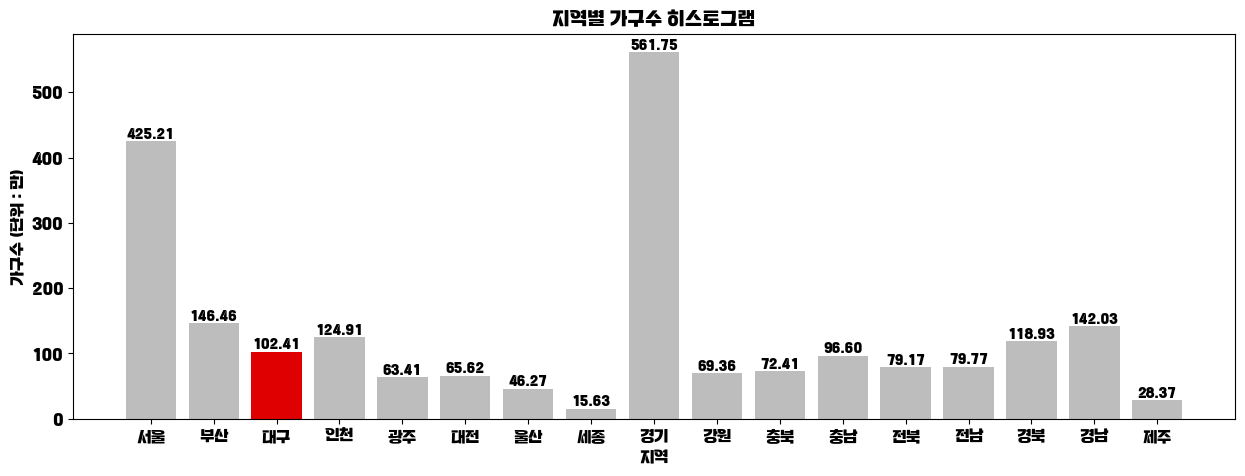

In [4]:
data = {
    "행정구역별(읍면동)": ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'],
    '2022': [i/10000 for i in df_house['2022']]
}
df = pd.DataFrame(data)
a='#BDBDBD'
b='#DF0101'
color=[a,a,b,a,a,a,a,a,a,a,a,a,a,a,a]
plt.figure(figsize=(15, 5))
plt.bar(df['행정구역별(읍면동)'], df['2022'], color=color)
# plt.xticks(rotation = 50)
plt.xlabel('지역')
plt.ylabel('가구수 (단위 : 만)')
plt.title('지역별 가구수 히스토그램')
for i, v in enumerate([i/10000 for i in df_house['2022']]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', size=10)
plt.show()

#### 월별 분양수

In [5]:
df_parcel = pd.read_excel('../분양_2016_2023.06.xlsx')
df_parcel.head()

,지역,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,...,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2022_parcel
0,서울특별시,0,67,242,1100,573,993,10807,0,0,...,0,0,148,114,231,0,0,6690,219,8723
1,부산광역시,0,631,0,1214,2334,224,4554,0,0,...,102,0,0,0,0,0,0,116,0,1487
2,대구광역시,0,656,566,1844,2940,511,9016,481,1124,...,69,178,440,3318,99,117,1501,105,481,8612
3,인천광역시,0,1950,2530,96,6828,3139,2154,0,354,...,162,767,1170,1326,875,474,1285,670,485,12569
4,광주광역시,0,0,0,97,1011,995,0,0,1779,...,0,0,0,0,161,131,0,238,0,726


#### 월별 분양수를 지역별 분양수로 합침

In [6]:
df_parcel = df_parcel[['지역', '2020_parcel', '2021_parcel', '2022_parcel']]
df_parcel

,지역,2020_parcel,2021_parcel,2022_parcel
0,서울특별시,15161,3176,8723
1,부산광역시,10468,5292,1487
2,대구광역시,22599,18936,8612
3,인천광역시,23363,17073,12569
4,광주광역시,5189,2365,726
5,대전광역시,5049,3664,9649
6,울산광역시,5534,3412,4337
7,세종특별자치시,585,3360,190
8,경기도,74468,58599,50594
9,강원도,5141,9380,7277


#### 지역별 분양수 히스토그램

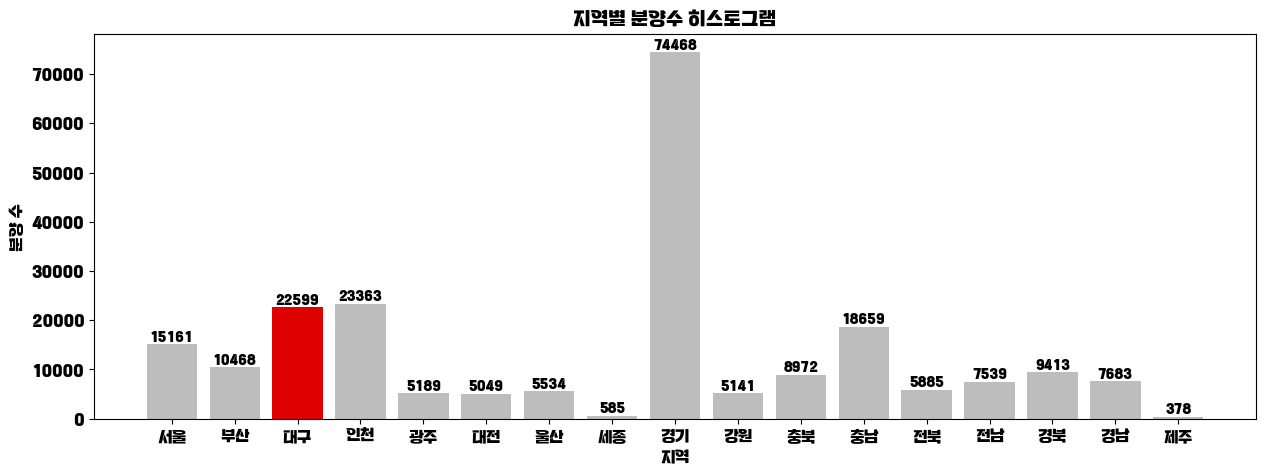

In [7]:
data = {
    "지역": ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주'],
    '2020_parcel': df_parcel['2020_parcel']
}
df = pd.DataFrame(data)
a='#BDBDBD'
b='#DF0101'
color=[a,a,b,a,a,a,a,a,a,a,a,a,a,a,a]
plt.figure(figsize=(15, 5))
plt.bar(df['지역'], df['2020_parcel'], color=color)
# plt.xticks(rotation = 90)
plt.xlabel('지역')
plt.ylabel('분양 수')
plt.title('지역별 분양수 히스토그램')
for i, v in enumerate(df['2020_parcel']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', size=10)
plt.show()

- 대구를 보면 지역대비 분양수가 많은 것을 알 수 있음

In [8]:
df_house_parcel = pd.concat([df_house, df_parcel], axis = 1)
df_house_parcel

,행정구역별(읍면동),2020,2021,2022,지역,2020_parcel,2021_parcel,2022_parcel
0,서울특별시,4126524,4191171,4252134,서울특별시,15161,3176,8723
1,부산광역시,1420252,1447194,1464557,부산광역시,10468,5292,1487
2,대구광역시,997416,1013488,1024104,대구광역시,22599,18936,8612
3,인천광역시,1178564,1216719,1249056,인천광역시,23363,17073,12569
4,광주광역시,608316,625511,634113,광주광역시,5189,2365,726
5,대전광역시,639020,648593,656236,대전광역시,5049,3664,9649
6,울산광역시,452995,460289,462748,울산광역시,5534,3412,4337
7,세종특별자치시,141133,147347,156289,세종특별자치시,585,3360,190
8,경기도,5294836,5492783,5617507,경기도,74468,58599,50594
9,강원도,668479,682635,693576,강원도,5141,9380,7277


#### 총 가구수 대비 분양수 구하기

In [9]:
df_house_parcel['2020_ratio'] = df_house_parcel['2020_parcel']*1000/df_house_parcel['2020']
df_house_parcel = df_house_parcel.set_index('지역')
df_house_parcel

,행정구역별(읍면동),2020,2021,2022,2020_parcel,2021_parcel,2022_parcel,2020_ratio
지역,,,,,,,,
서울특별시,서울특별시,4126524,4191171,4252134,15161,3176,8723,3.674037
부산광역시,부산광역시,1420252,1447194,1464557,10468,5292,1487,7.370523
대구광역시,대구광역시,997416,1013488,1024104,22599,18936,8612,22.657547
인천광역시,인천광역시,1178564,1216719,1249056,23363,17073,12569,19.823276
광주광역시,광주광역시,608316,625511,634113,5189,2365,726,8.530106
대전광역시,대전광역시,639020,648593,656236,5049,3664,9649,7.901161
울산광역시,울산광역시,452995,460289,462748,5534,3412,4337,12.216470
세종특별자치시,세종특별자치시,141133,147347,156289,585,3360,190,4.145026
경기도,경기도,5294836,5492783,5617507,74468,58599,50594,14.064269


In [10]:
result = []
for i in df_house_parcel['2020_ratio']:
    result.append(round(i, 2))
result = sorted(result, reverse=True)
result

[22.66,
 20.24,
 19.82,
 14.06,
 12.89,
 12.22,
 9.76,
 8.53,
 8.17,
 7.9,
 7.69,
 7.66,
 7.37,
 5.58,
 4.15,
 3.67,
 1.4]

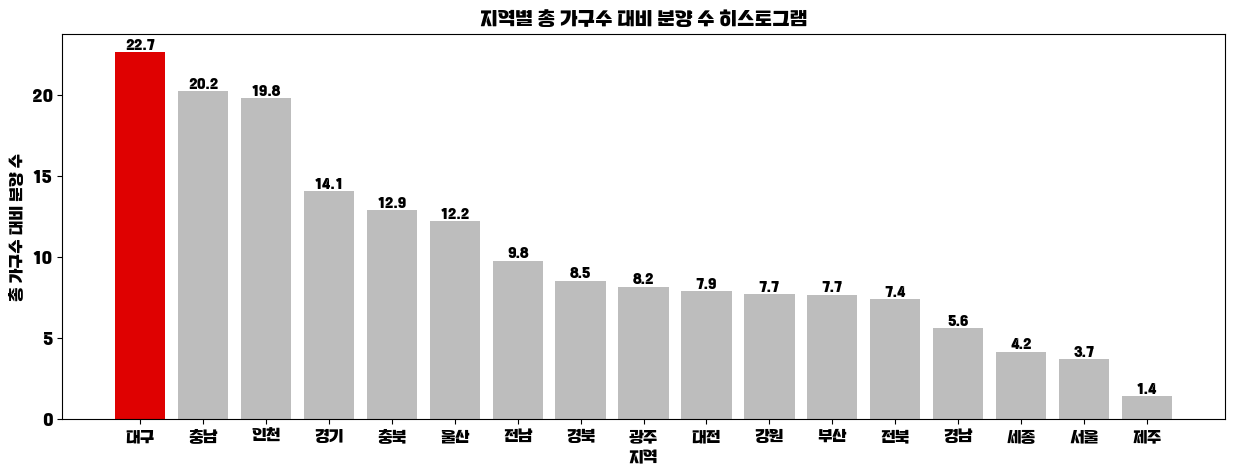

In [11]:
data = {
    "지역": ['대구', '충남', '인천', '경기', '충북', '울산', '전남', '경북', '광주', '대전', '강원', '부산', '전북', '경남', '세종', '서울', '제주'],
    '2020_house_parcel': result
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='2020_house_parcel', ascending=False)

a = '#BDBDBD'
b = '#DF0101'
color = [b,a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, a, a]
idx = df_sorted['지역']
plt.figure(figsize=(15, 5))
plt.bar(df_sorted['지역'], df_sorted['2020_house_parcel'], color=color)
# plt.xticks(rotation=90)
plt.xlabel('지역')
plt.ylabel('총 가구수 대비 분양 수')
plt.title('지역별 총 가구수 대비 분양 수 히스토그램')
for i, v in enumerate(df_sorted['2020_house_parcel']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom', size=10)
plt.show()
# # 데이터 레이블 표시하기
# for i, v in enumerate(ratio_exc_sejong['일반공급 경쟁률']):
#     plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', size=15)

- 대구가 가구수 대비 분양수가 많은 것을 알 수 있음

- 막대그래프 말고 파이차트로 표현

Text(0.5, 1.0, '서울 및 광역시 가구수 대비 분양수 비율')

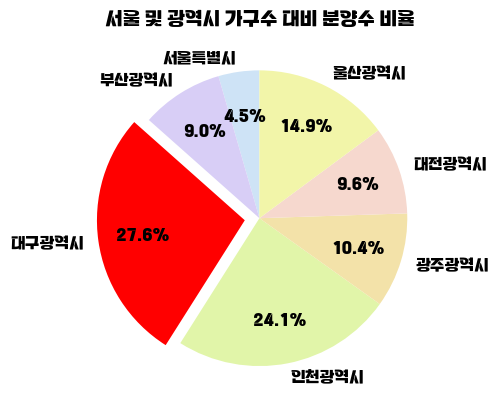

In [12]:
df_house_parcel_city = df_house_parcel[:7]
df_house_parcel_city
color=['#CEE3F6','#D8CEF6','#FF0000','#E1F5A9','#F3E2A9','#F6D8CE','#F2F5A9']
explod = [0, 0,0.1, 0, 0, 0, 0]
plt.pie(df_house_parcel_city['2020_ratio'], labels = df_house_parcel_city['행정구역별(읍면동)'], colors=color, autopct='%1.1f%%', pctdistance=0.7, explode=explod, startangle = 90)
plt.title('서울 및 광역시 가구수 대비 분양수 비율')

#### 평균 분양 가격 데이터

In [13]:
df_price = pd.read_excel('../지역별_규모별_㎡당_평균_분양가격_20230810182208.xlsx')
df_price.head()

,지역,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
0,서울특별시,9582,9817,9647,9771,8550,8550,8550,8273,8503,8503,9041,9024
1,부산광역시,5135,5188,5121,5121,5311,5436,5452,5436,5458,5597,6007,5896
2,대구광역시,4843,4969,4977,4894,4863,4978,5090,5085,5080,5109,5020,5121
3,인천광역시,4626,4612,4625,4749,4790,4818,4949,5165,5189,5031,5043,5047
4,광주광역시,4417,4416,4544,4544,4543,4656,4666,4736,4654,4724,4753,4432


- 월별 데이터로 년별 평균 분양가 구하기

In [14]:
df_price['2022_avg'] = round(df_price.sum(axis=1)/12)
df_price.head(17)

C:\Users\user\AppData\Local\Temp\ipykernel_7840\692495564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_price['2022_avg'] = round(df_price.sum(axis=1)/12)


,지역,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12,2022_avg
0,서울특별시,9582,9817,9647,9771,8550,8550,8550,8273,8503,8503,9041,9024,8984.0
1,부산광역시,5135,5188,5121,5121,5311,5436,5452,5436,5458,5597,6007,5896,5430.0
2,대구광역시,4843,4969,4977,4894,4863,4978,5090,5085,5080,5109,5020,5121,5002.0
3,인천광역시,4626,4612,4625,4749,4790,4818,4949,5165,5189,5031,5043,5047,4887.0
4,광주광역시,4417,4416,4544,4544,4543,4656,4666,4736,4654,4724,4753,4432,4590.0
5,대전광역시,3987,4008,4008,4146,4156,4170,4170,4170,4330,4578,4587,4636,4246.0
6,울산광역시,4446,4446,4815,5523,5460,5449,5449,5434,5434,5492,5737,5552,5270.0
7,세종특별자치시,3614,3614,3614,3614,3614,3614,3208,3208,3208,3208,3208,3721,3454.0
8,경기도,4567,4765,4786,4812,4858,4928,4956,5024,5154,5237,5026,5203,4943.0
9,강원도,3031,3070,3138,3183,3200,3237,3250,3280,3297,3454,3757,3845,3312.0


#### 연봉대비 분양가

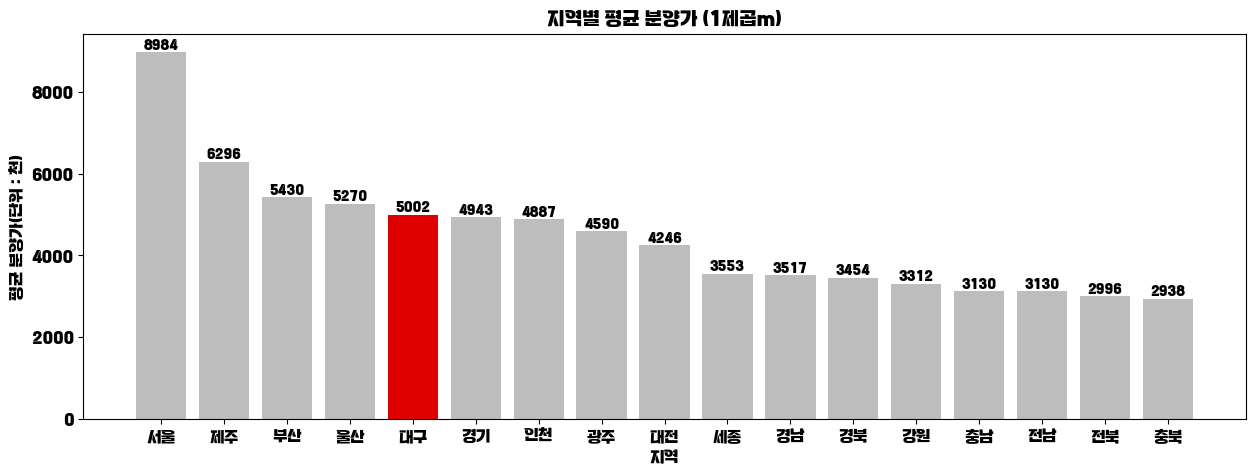

In [15]:
data = {
    "지역": ['서울', '제주', '부산', '울산', '대구', '경기', '인천', '광주', '대전', '세종', '경남', '경북', '강원', '충남', '전남', '전북', '충북'],
    '2020_house_parcel': [i for i in df_price['2022_avg']]}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by = '2020_house_parcel', ascending=False)
a='#BDBDBD'
b='#DF0101'
color=[a,a,a,a,b,a,a,a,a,a,a,a,a,a,a]
plt.figure(figsize=(15, 5))
plt.bar(df['지역'], df_sorted['2020_house_parcel'], color = color)
# plt.xticks(rotation = 90)
plt.xlabel('지역')
plt.ylabel('평균 분양가(단위 : 천)')
plt.title('지역별 평균 분양가 (1제곱m)')
for i, v in enumerate(df_sorted['2020_house_parcel']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', size=10)
plt.show()

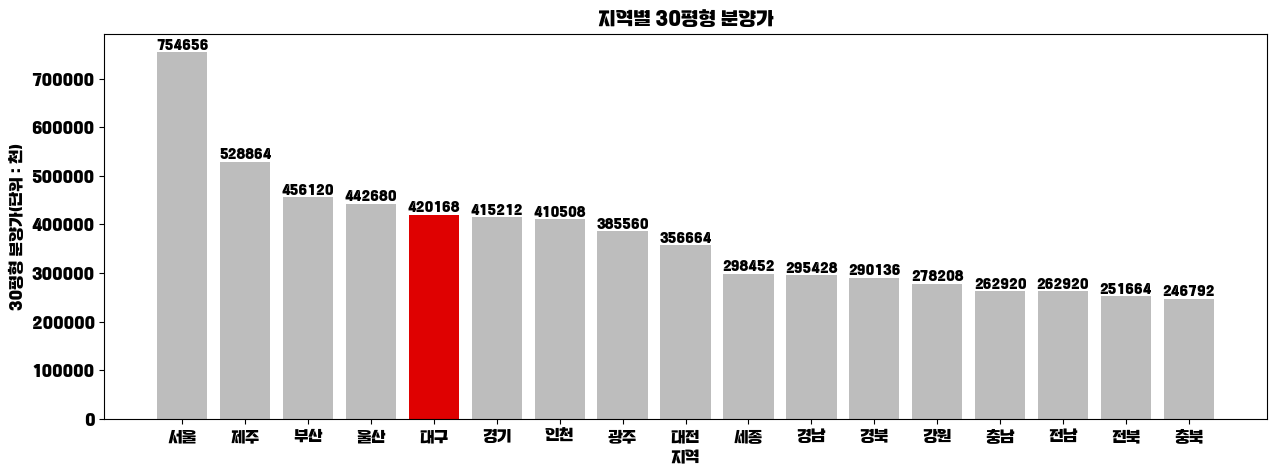

In [16]:
data = {
    "지역": ['서울', '제주', '부산', '울산', '대구', '경기', '인천', '광주', '대전', '세종', '경남', '경북', '강원', '충남', '전남', '전북', '충북'],
    '2020_house_parcel': [i*84 for i in df_price['2022_avg']]}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by = '2020_house_parcel', ascending=False)
a='#BDBDBD'
b='#DF0101'
color=[a,a,a,a,b,a,a,a,a,a,a,a,a,a,a]
plt.figure(figsize=(15, 5))
plt.bar(df['지역'], df_sorted['2020_house_parcel'], color = color)
# plt.xticks(rotation = 90)
plt.xlabel('지역')
plt.ylabel('30평형 분양가(단위 : 천)')
plt.title('지역별 30평형 분양가')
for i, v in enumerate(df_sorted['2020_house_parcel']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', size=10)
plt.show()

#### 30평 가격

#### 지역별 월 급여액

In [17]:
df_salary = pd.read_excel('../행정구역_시도___산업_규모별_임금_및_근로시간_상용근로자_상용근로자_5인이상_사업체__20230810194341.xlsx')
df_salary.head()

,지역별,상용월급여액 (원)
0,서울특별시,4082853
1,부산광역시,3404468
2,대구광역시,3202101
3,인천광역시,3418862
4,광주광역시,3284566


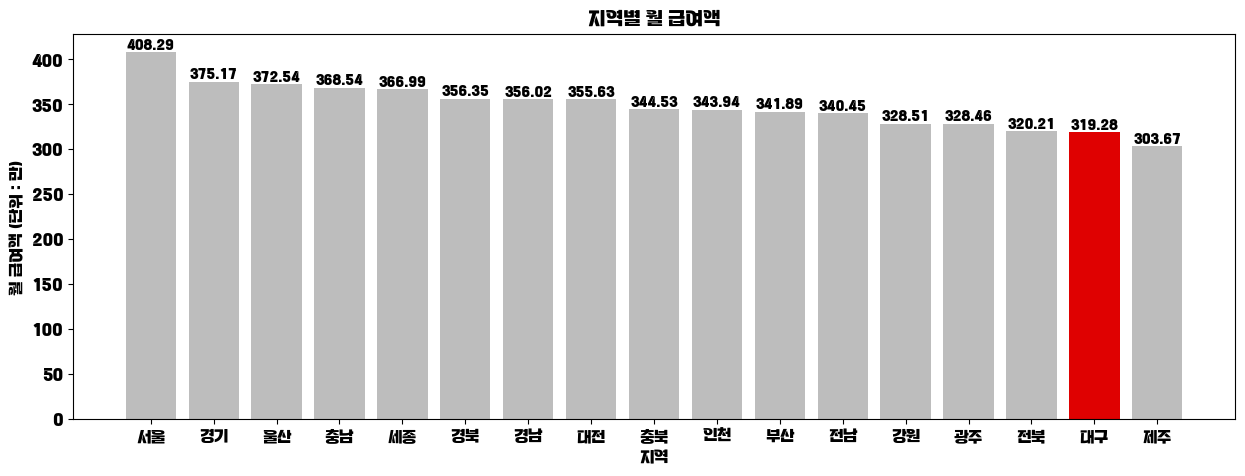

In [18]:
data = {
    "지역": ['서울', '경기', '울산', '충남', '세종', '경북', '경남', '대전', '충북', '인천', '부산', '전남', '강원', '광주', '전북', '대구', '제주'],
    'salary': [i/10000 for i in df_salary['상용월급여액 (원)']]}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by = 'salary', ascending=False)
a='#BDBDBD'
b='#DF0101'
color=[a,a,a,a,a,a,a,a,a,a,a,a,a,a, a, b, a]
plt.figure(figsize=(15, 5))
plt.bar(df['지역'], df_sorted['salary'], color=color)
# plt.xticks(rotation = 90)
plt.xlabel('지역')
plt.ylabel('월 급여액 (단위 : 만)')
plt.title('지역별 월 급여액')
for i, v in enumerate(df_sorted['salary']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', size=10)
plt.show()

- 지역별 월 급여액을 살펴보면 대구가 낮은 것을 알 수 있음

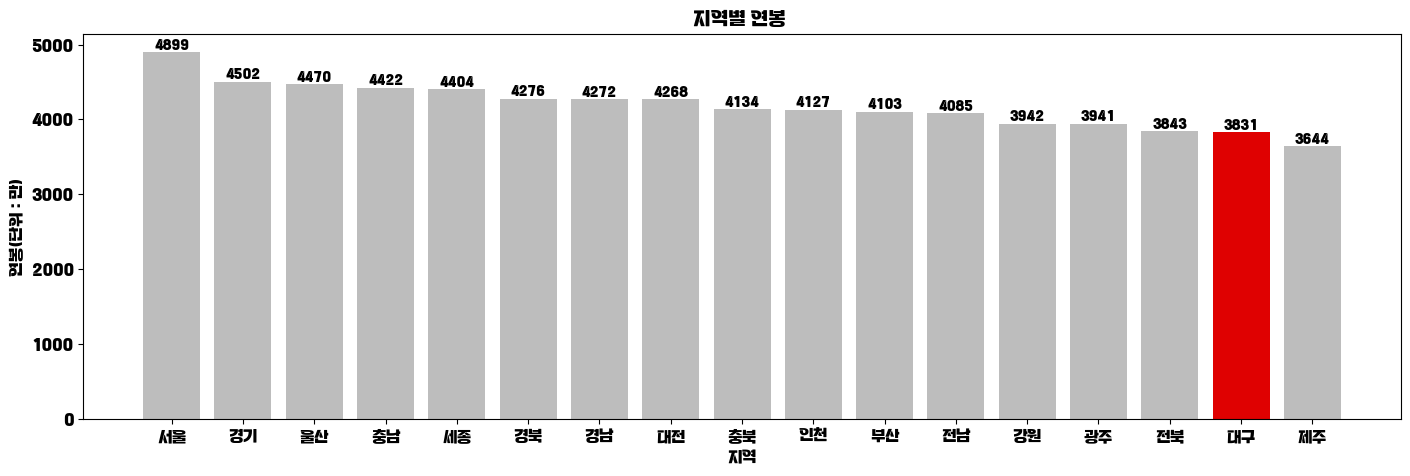

In [19]:
data = {
    "지역": ['서울', '경기', '울산', '충남', '세종', '경북', '경남', '대전', '충북', '인천', '부산', '전남', '강원', '광주', '전북', '대구', '제주'],
    'salary': [i*12/10000 for i in df_salary['상용월급여액 (원)']]}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by = 'salary', ascending=False)
a='#BDBDBD'
b='#DF0101'
color=[a,a,a,a,a,a,a,a,a,a,a,a,a,a, a, b, a]
plt.figure(figsize=(17, 5))
plt.bar(df['지역'], df_sorted['salary'], color=color)
# plt.xticks(rotation = 90)
plt.xlabel('지역')
plt.ylabel('연봉(단위 : 만)')
plt.title('지역별 연봉 ')
for i, v in enumerate(df_sorted['salary']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', size=10)
plt.show()

#### 연봉(월급)대비 분양가 구하기

In [20]:
df_salary['salary_price_ratio'] = df_price['2022_avg'] *10000/ df_salary['상용월급여액 (원)']
df_salary

,지역별,상용월급여액 (원),salary_price_ratio
0,서울특별시,4082853,22.004221
1,부산광역시,3404468,15.949629
2,대구광역시,3202101,15.620994
3,인천광역시,3418862,14.294230
4,광주광역시,3284566,13.974449
5,대전광역시,3556267,11.939486
6,울산광역시,3725381,14.146204
7,세종특별자치시,3685371,9.372191
8,경기도,3751651,13.175533
9,강원도,3285138,10.081768


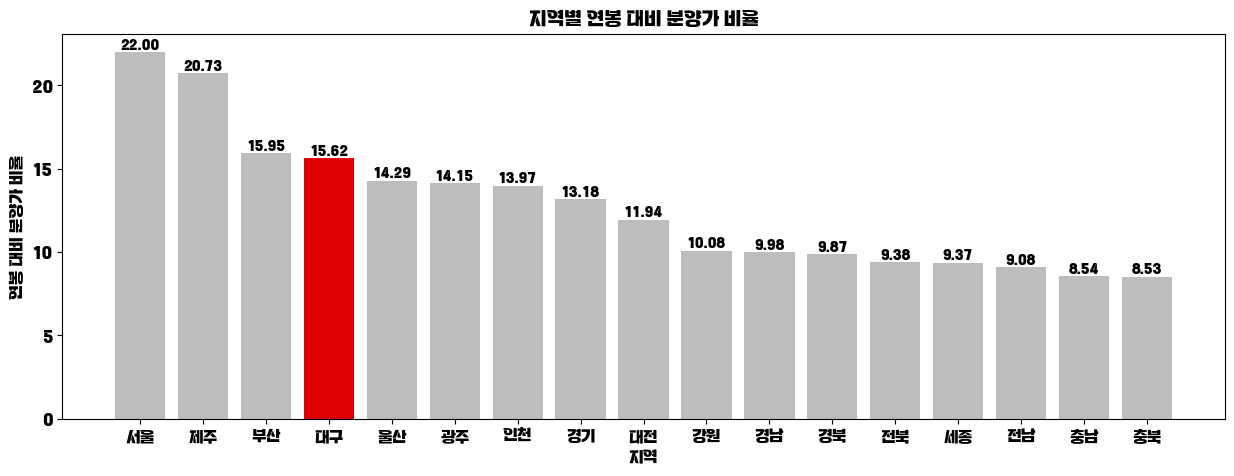

In [21]:
data = {
    "지역": ['서울', '제주', '부산', '대구', '울산', '광주', '인천', '경기','대전', '강원', '경남', '경북', '전북', '세종', '전남', '충남', '충북'],
    'salary_price_ratio': [i for i in df_salary['salary_price_ratio']]}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by = 'salary_price_ratio', ascending=False)
a='#BDBDBD'
b='#DF0101'
color=[a,a,a,b,a,a,a,a,a,a,a,a,a,a,a]
plt.figure(figsize=(15, 5))
plt.bar(df['지역'], df_sorted['salary_price_ratio'], color=color)
# plt.xticks(rotation = 90)
plt.xlabel('지역')
plt.ylabel('연봉 대비 분양가 비율')
plt.title('지역별 연봉 대비 분양가 비율')
for i, v in enumerate(df_sorted['salary_price_ratio']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', size=10)
plt.show()